# Machine learning - jour 2

- Gauthier CADET
- Sophie HERB
- Tristan SCHWARTZ

## Imports

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Dataset
préparer le dataset pour son utilisation
- suppression des données vide
- identifications des colonnes inutiles

In [4]:
df = pd.read_csv("./BankChurners.csv", header=0, delimiter=",")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [5]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
df_clean = df.dropna()
df_clean.shape

(10127, 23)

In [15]:
counts = df_clean['Attrition_Flag'].value_counts()
counts

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

Résultats non équilibrés, beaucoup plus de clients fidèles que de clients qui quittent la banque. Le modèle sera plus précis sur la détermination des clients qui resteront dans la banque que pour ceux qui la quitteront.

In [16]:
counts_gender = df_clean['Gender'].value_counts()
counts_gender

1    5358
0    4769
Name: Gender, dtype: int64

Nombre équilibrés d'homme et femme

26
73
delta age_min-age_max 47


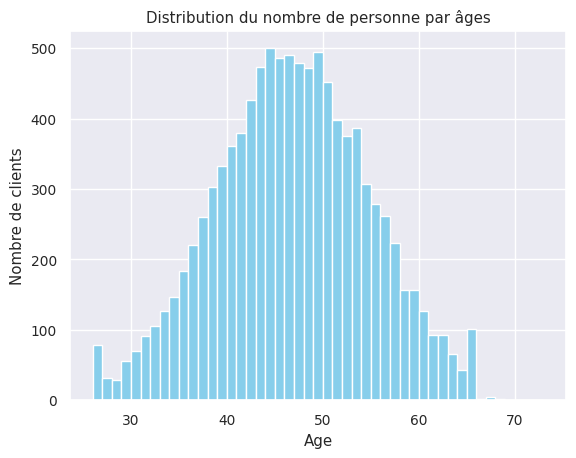

In [19]:
ages = df_clean['Customer_Age']
delta_age = max(df_clean['Customer_Age']) - min(df_clean['Customer_Age'])
print(min(df_clean['Customer_Age']))
print(max(df_clean['Customer_Age']))
print("delta age_min-age_max",delta_age)
plt.hist(ages, bins=delta_age, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Nombre de clients')
plt.title('Distribution du nombre de personne par âges')
plt.show()

Pas de données d'âge aberrantes, répartition qui semble cohérente

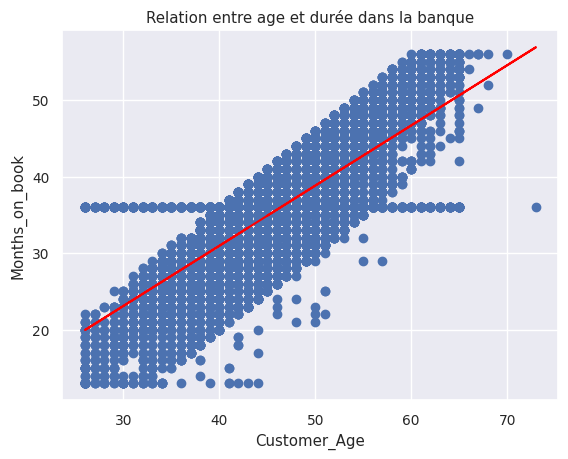

In [20]:
customer_age = df_clean['Customer_Age']
monts_on_book = df_clean['Months_on_book']

plt.scatter(customer_age,monts_on_book)
plt.xlabel('Customer_Age')
plt.ylabel('Months_on_book')
plt.title('Relation entre age et durée dans la banque')

slope, intercept = np.polyfit(customer_age, monts_on_book, 1)
plt.plot(customer_age, slope * customer_age + intercept, color='red')

Forte corrélation entre l'âge des clients et la durée de leur souscription dans la banque, l'une des deux feature pourra être écartée.

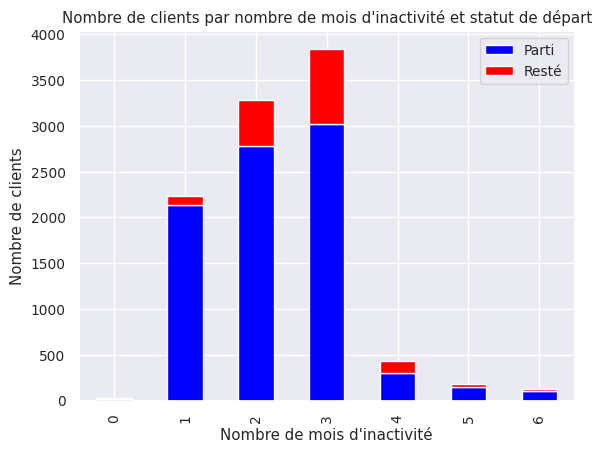

In [22]:
aggregated_data = df_clean.groupby(['Months_Inactive_12_mon', 'Attrition_Flag']).size().unstack(fill_value=0)
aggregated_data.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.xlabel('Nombre de mois d\'inactivité')
plt.ylabel('Nombre de clients')
plt.title('Nombre de clients par nombre de mois d\'inactivité et statut de départ')
plt.legend(['Parti', 'Resté'])
plt.show()

Il n'y a pas de lien évident entre le nombre de mois d'inactivité et le départ d'un client.

In [8]:
df_clean2 = df_clean
df_clean2['Attrition_Flag'] = pd.factorize(df_clean2['Attrition_Flag'])[0]
df_clean2['Education_Level'] = pd.factorize(df_clean2['Education_Level'])[0]
df_clean2['Marital_Status'] = pd.factorize(df_clean2['Marital_Status'])[0]
df_clean2['Income_Category'] = pd.factorize(df_clean2['Income_Category'])[0]
df_clean2['Card_Category'] = pd.factorize(df_clean2['Card_Category'])[0]
df_clean2['Gender'] = pd.factorize(df_clean2['Gender'])[0]
df_clean2

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,0,45,0,3,0,0,0,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,0,49,1,5,1,1,1,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,0,51,0,3,1,0,2,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,0,40,1,4,0,2,1,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,0,40,0,3,2,0,0,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,0,2,1,1,3,0,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,1,41,0,2,3,3,3,0,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,1,44,1,1,0,0,1,0,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,1,30,0,2,1,2,3,0,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


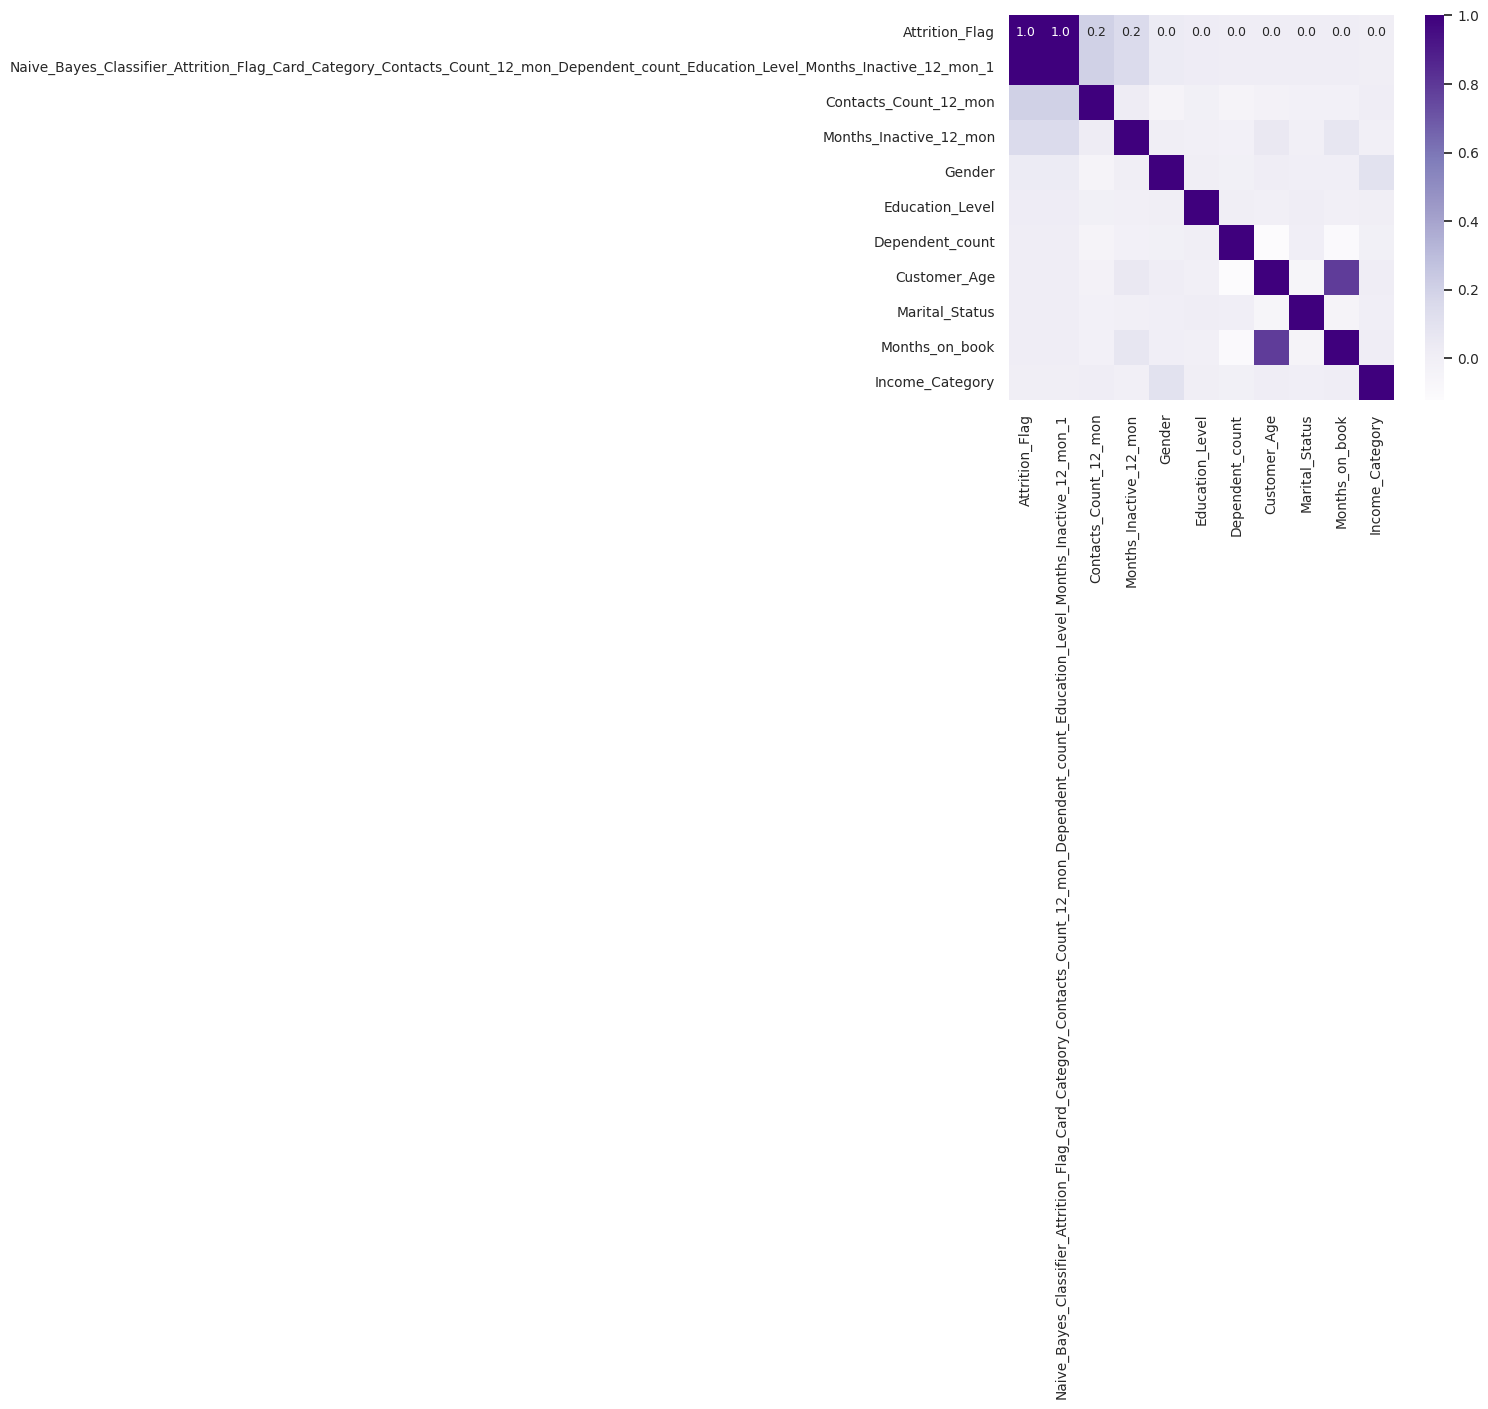

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = df_clean2.corr()

plt.figure(figsize=(8, 5))
k=11
cols = corrmat.nlargest(k, 'Attrition_Flag')['Attrition_Flag'].index
cm = np.corrcoef(df_clean2[cols].values.T)
sns.set(font_scale=0.9)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.01f', annot_kws={'size': 9}, 
                 yticklabels=cols.values, xticklabels=cols.values, cmap="Purples")
plt.show()

### Analyse
On peut supprimer la colonne de l'age ou le nombre de mois depuis lequel le client est dans la banque

Il y a des colonnes inutiles comme le numéro de client que l'on pourrait supprimer, de la même manière :
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2

On devra supprimer la colonne Attrition_flag car c'est celle que l'on doit deviner

In [10]:
df_clean3 = df_clean2.drop(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)
df_clean3

,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,3,0,0,0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,5,1,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,3,1,0,2,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,4,0,2,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,3,2,0,0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,2,1,1,3,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,2,3,3,3,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,1,0,0,1,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,2,1,2,3,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


## Entrainement du modèle

In [18]:
from sklearn.model_selection import train_test_split

X = np.array(df_clean2.drop(['Attrition_Flag'],axis=1).values, dtype=float)
y = np.array(df_clean2['Attrition_Flag'].values, dtype=float)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=0)

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
# param_grid = {
#     'C': [0.1],
#     'gamma': [1],
#     'gamma': ['scale', 'auto'],
#     'kernel': ['linear']
# }

# # n-jobs=1 to use all CPUs
# # refit to have the best model at the end
# grid = GridSearchCV(SVC(), param_grid, refit = True, n_jobs=1)

# # fitting the model for grid search
# grid.fit(X_train, y_train)

# # print best parameter after tuning
# print(grid.best_params_)

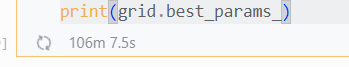

In [ ]:
from sklearn.ensemble import RandomForestClassifier


randomForest = RandomForestClassifier()
randomForest.fit(X_train, y_train)